# Project Overview

In [51]:
# This project explores the London housing market using a large
# dataset of residential properties and historical price estimates.
# The aim is to understand how property characteristics, location,
# and time influence both purchase prices and rental values.
#
# The analysis focuses on four main areas:
# - The composition of London’s housing stock (property types, sizes
#   and bedrooms contained)
# - How prices and rents vary with property characteristics
# - How property values have changed over time 
# - How property values differ across areas of the city
#
# Through a combination of descriptive analysis, comparisons, and
# time-series trends, the project highlights clear patterns in
# pricing and market behaviour. In particular, it shows the strong
# role of property size, type, and location in shaping both sale
# prices and rents, as well as broader changes in the market over time.

# 1. Setup and Data Loading

In [2]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import warnings
from datetime import datetime
import ast

In [3]:
# Load dataset.
df = pd.read_csv(r"C:\Users\Arsen\OneDrive - University College London\Desktop\Data Analyst\Project\kaggle_london_house_price_data.csv")

# 2. Data Exploration

In [4]:
pd.set_option('display.max_columns', 30)

In [5]:
df.head()

,fullAddress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,currentEnergyRating,rentEstimate_lowerPrice,rentEstimate_currentPrice,rentEstimate_upperPrice,saleEstimate_lowerPrice,saleEstimate_currentPrice,saleEstimate_upperPrice,saleEstimate_confidenceLevel,saleEstimate_ingestedAt,saleEstimate_valueChange.numericChange,saleEstimate_valueChange.percentageChange,saleEstimate_valueChange.saleDate,history_date,history_price,history_percentageChange,history_numericChange
0,"Flat 9, 35 Furnival Street, London, EC4A 1JQ",EC4A 1JQ,England,EC4A,51.517282,-0.110314,1.0,1.0,45.0,1.0,Leasehold,Purpose Built Flat,NaN,2100.0,2350.0,2600.0,570000.0,600000.0,630000.0,HIGH,2024-10-07T13:26:59.894Z,244000.0,68.539326,2010-03-30,1995-01-02,830000,NaN,NaN
1,"Flat 6, 35 Furnival Street, London, EC4A 1JQ",EC4A 1JQ,England,EC4A,51.517282,-0.110314,NaN,NaN,NaN,NaN,Leasehold,Flat/Maisonette,NaN,2100.0,2350.0,2600.0,540000.0,600000.0,660000.0,MEDIUM,2024-10-07T13:26:59.894Z,425000.0,242.857143,2000-05-26,1995-01-02,830000,NaN,NaN
2,"Flat 35, Octavia House, Medway Street, London,...",SW1P 2TA,England,SW1P,51.495505,-0.132379,2.0,2.0,71.0,1.0,Leasehold,Flat/Maisonette,C,2650.0,2950.0,3250.0,683000.0,759000.0,834000.0,MEDIUM,2025-01-10T11:04:57.114Z,49000.0,6.901408,2019-09-04,1995-01-03,249950,NaN,NaN
3,"24 Chester Court, Lomond Grove, London, SE5 7HS",SE5 7HS,England,SE5,51.478185,-0.092201,1.0,1.0,64.0,1.0,Leasehold,Flat/Maisonette,D,1850.0,2000.0,2100.0,368000.0,388000.0,407000.0,HIGH,2024-10-07T13:26:59.894Z,28000.0,7.777778,2024-01-25,1995-01-03,32000,NaN,NaN
4,"18 Alexandra Gardens, London, N10 3RL",N10 3RL,England,N10,51.588774,-0.139599,1.0,4.0,137.0,2.0,Freehold,End Terrace House,D,4350.0,4850.0,5350.0,1198000.0,1261000.0,1324000.0,HIGH,2024-10-07T13:26:59.894Z,81000.0,6.864407,2022-12-14,1995-01-03,133000,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418201 entries, 0 to 418200
Data columns (total 28 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   fullAddress                                418201 non-null  object 
 1   postcode                                   418201 non-null  object 
 2   country                                    418201 non-null  object 
 3   outcode                                    418201 non-null  object 
 4   latitude                                   418201 non-null  float64
 5   longitude                                  418201 non-null  float64
 6   bathrooms                                  340270 non-null  float64
 7   bedrooms                                   377665 non-null  float64
 8   floorAreaSqM                               392991 non-null  float64
 9   livingRooms                                357701 non-null  float64
 10  tenure  

# 3. Data Cleaning 

In [6]:
# 1. Check missing data across the data frame.

# NOTE:
# Several columns (e.g. bathrooms, bedrooms) have substantial missing values.
# We do NOT drop rows at this stage, as this could remove a large portion of the dataset and skew EDA results.
# We keep the full dataset and only filter the relevant columns when required for a specific summary/plot.

for col in df.columns:
    values_missing = np.sum(df[col].isnull())
    print('{} - {}'.format(col, values_missing))

fullAddress - 0
postcode - 0
country - 0
outcode - 0
latitude - 0
longitude - 0
bathrooms - 77931
bedrooms - 40536
floorAreaSqM - 25210
livingRooms - 60500
tenure - 11512
propertyType - 1136
currentEnergyRating - 84526
rentEstimate_lowerPrice - 1741
rentEstimate_currentPrice - 1741
rentEstimate_upperPrice - 1741
saleEstimate_lowerPrice - 640
saleEstimate_currentPrice - 640
saleEstimate_upperPrice - 640
saleEstimate_confidenceLevel - 640
saleEstimate_ingestedAt - 640
saleEstimate_valueChange.numericChange - 640
saleEstimate_valueChange.percentageChange - 640
saleEstimate_valueChange.saleDate - 640
history_date - 0
history_price - 0
history_percentageChange - 180219
history_numericChange - 180219


In [27]:
#2. Data types for our columns.  

df.dtypes

fullAddress                                   object
postcode                                      object
country                                       object
outcode                                       object
latitude                                     float64
longitude                                    float64
bathrooms                                    float64
bedrooms                                     float64
floorAreaSqM                                 float64
livingRooms                                  float64
tenure                                        object
propertyType                                  object
currentEnergyRating                           object
rentEstimate_lowerPrice                      float64
rentEstimate_currentPrice                    float64
rentEstimate_upperPrice                      float64
saleEstimate_lowerPrice                      float64
saleEstimate_currentPrice                    float64
saleEstimate_upperPrice                      f

In [7]:
# Convert selected numeric columns (we are planning to use) to integers to improve readability and
# simplify analysis and visualisation (these fields are whole numbers
# or currency values, so decimal precision is not required).

df['bedrooms'] = df['bedrooms'].astype('Int64')
df['floorAreaSqM'] = df['floorAreaSqM'].astype('Int64')
df['rentEstimate_currentPrice'] = df['rentEstimate_currentPrice'].astype('Int64')
df['saleEstimate_currentPrice'] = df['saleEstimate_currentPrice'].astype('Int64')

In [8]:
# 3. Drop any duplicates.

df.drop_duplicates().head()

,fullAddress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,currentEnergyRating,rentEstimate_lowerPrice,rentEstimate_currentPrice,rentEstimate_upperPrice,saleEstimate_lowerPrice,saleEstimate_currentPrice,saleEstimate_upperPrice,saleEstimate_confidenceLevel,saleEstimate_ingestedAt,saleEstimate_valueChange.numericChange,saleEstimate_valueChange.percentageChange,saleEstimate_valueChange.saleDate,history_date,history_price,history_percentageChange,history_numericChange
0,"Flat 9, 35 Furnival Street, London, EC4A 1JQ",EC4A 1JQ,England,EC4A,51.517282,-0.110314,1.0,1,45,1.0,Leasehold,Purpose Built Flat,NaN,2100.0,2350,2600.0,570000.0,600000,630000.0,HIGH,2024-10-07T13:26:59.894Z,244000.0,68.539326,2010-03-30,1995-01-02,830000,NaN,NaN
1,"Flat 6, 35 Furnival Street, London, EC4A 1JQ",EC4A 1JQ,England,EC4A,51.517282,-0.110314,NaN,<NA>,<NA>,NaN,Leasehold,Flat/Maisonette,NaN,2100.0,2350,2600.0,540000.0,600000,660000.0,MEDIUM,2024-10-07T13:26:59.894Z,425000.0,242.857143,2000-05-26,1995-01-02,830000,NaN,NaN
2,"Flat 35, Octavia House, Medway Street, London,...",SW1P 2TA,England,SW1P,51.495505,-0.132379,2.0,2,71,1.0,Leasehold,Flat/Maisonette,C,2650.0,2950,3250.0,683000.0,759000,834000.0,MEDIUM,2025-01-10T11:04:57.114Z,49000.0,6.901408,2019-09-04,1995-01-03,249950,NaN,NaN
3,"24 Chester Court, Lomond Grove, London, SE5 7HS",SE5 7HS,England,SE5,51.478185,-0.092201,1.0,1,64,1.0,Leasehold,Flat/Maisonette,D,1850.0,2000,2100.0,368000.0,388000,407000.0,HIGH,2024-10-07T13:26:59.894Z,28000.0,7.777778,2024-01-25,1995-01-03,32000,NaN,NaN
4,"18 Alexandra Gardens, London, N10 3RL",N10 3RL,England,N10,51.588774,-0.139599,1.0,4,137,2.0,Freehold,End Terrace House,D,4350.0,4850,5350.0,1198000.0,1261000,1324000.0,HIGH,2024-10-07T13:26:59.894Z,81000.0,6.864407,2022-12-14,1995-01-03,133000,NaN,NaN


# 4. Explanatory Data Analysis

# A. Composition of London’s Housing Stock

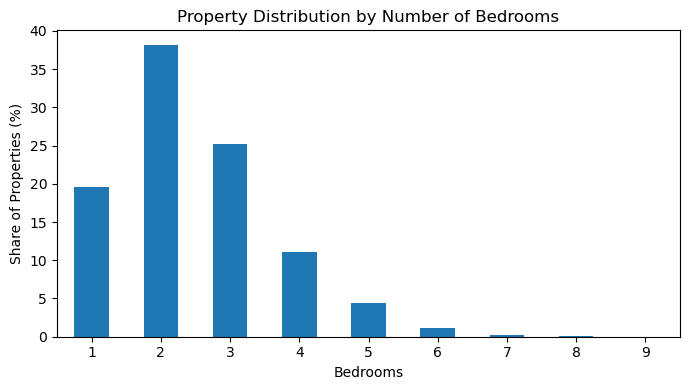

In [61]:
# A.1 Bedroom mix of London housing stock (as % of total)

# NOTE: We keep the full dataset for EDA, but for this chart we only need:
# - bedrooms (category)
#- fullAddress (used for counting properties)
# So we drop missing values only for the columns required for this visualisation.
# We will use this same approach in later calculations.

bedroom_df = df.dropna(subset=["bedrooms", "fullAddress"]).copy()

# Count properties per number of bedrooms 
bedroom_distribution = (
    bedroom_df
    .groupby("bedrooms")
    .agg(property_count=("fullAddress", "count"))
    .reset_index()
)


# Convert counts to % share of total housing stock
bedroom_distribution["percentage"] = (
    bedroom_distribution["property_count"]
    / bedroom_distribution["property_count"].sum()
    * 100
)

# Plot
ax = bedroom_distribution.plot(
    x="bedrooms",
    y="percentage",
    kind="bar",
    figsize=(7, 4),
    legend=False
)

ax.set_title("Property Distribution by Number of Bedrooms")
ax.set_xlabel("Bedrooms")
ax.set_ylabel("Share of Properties (%)")
plt.xticks(rotation=0)
plt.tight_layout()

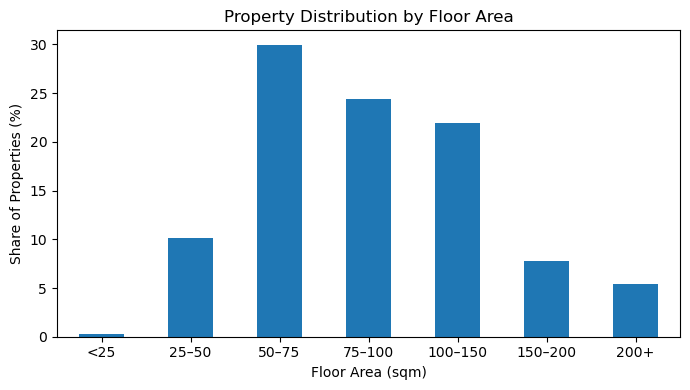

In [62]:
# A.2 Distribution of properties by floor area (sqm)


# For this analysis we only need:
# - floorAreaSqM 
# - fullAddress 
# As before, missing values in floorAreaSqM are excluded. 

area_df = df.dropna(subset=["floorAreaSqM", "fullAddress"]).copy() 

# To keep the chart readable, we group the floor area into into broad area bands.
bins = [0, 25, 50, 75, 100, 150, 200, np.inf]
labels = ["<25", "25–50", "50–75", "75–100", "100–150", "150–200", "200+"]


area_df["area_bin"] = pd.cut(
    area_df["floorAreaSqM"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Count properties per floor area band 
area_distribution = (
    area_df
    .groupby("area_bin", observed=True)
    .agg(property_count=("fullAddress", "count"))
    .reset_index()
)


# Convert counts to % share of total housing stock
area_distribution["percentage"] = (
    area_distribution["property_count"]
    / area_distribution["property_count"].sum()
    * 100
)

# Plot
ax = area_distribution.plot(
    x="area_bin",
    y="percentage",
    kind="bar",
    figsize=(7, 4),
    legend=False
)

ax.set_title("Property Distribution by Floor Area")
ax.set_xlabel("Floor Area (sqm)")
ax.set_ylabel("Share of Properties (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [63]:
# A.3 Distribution of properties by type

# For this analysis we only need:
# - propertyType 
# - fullAddress 
# As before, missing values in propertyType  are excluded. 

type_df = df.dropna(subset=["propertyType", "fullAddress"]).copy() 

# type_df = (df.groupby("propertyType").agg(property_count=("fullAddress", "count")).reset_index())  

# We create a high-level property_category from the raw propertyType values.
#
# The raw propertyType column is very granular.
# To make the data easier to analyse and visualise, we map each property
# into one of the main categories.
#
# Categories:
# 1. Flats:
#    - Any property type containing "Flat" or "Maisonette"
#
# 2. Detached Houses:
#    - Property types containing "Detached"
#    - Excludes bungalows (e.g. "Detached Bungalow")
#
# 3. Semi-Detached Houses:
#    - Property types containing "Semi-Detached"
#
# 4. Terraced Houses:
#    - Property types containing "Terrace" or "Terraced"
#    - Excludes bungalows (e.g. "Terraced Bungalow")
#
# 5. Bungalows:
#    - Any property type containing "Bungalow"
#
# 6. Other Properties:
#    - Any remaining or unexpected property types that do not match the rules above


conditions = [
    # Flats
    type_df["propertyType"].str.contains("Flat|Maisonette", case=False, na=False),

    # Detached houses (but not bungalows)
    type_df["propertyType"].str.contains("Detached", case=False, na=False)
    & ~type_df["propertyType"].str.contains("Bungalow", case=False, na=False),

    # Semi-detached houses
    type_df["propertyType"].str.contains("Semi-Detached", case=False, na=False),

    # Terraced houses (but not bungalows)
    type_df["propertyType"].str.contains("Terrace|Terraced", case=False, na=False)
    & ~type_df["propertyType"].str.contains("Bungalow", case=False, na=False),

    # Bungalows
    type_df["propertyType"].str.contains("Bungalow", case=False, na=False),
]

choices = [
    "Flats",
    "Detached Houses",
    "Semi-Detached Houses",
    "Terraced Houses",
    "Bungalows",
]

type_df["property_category"] = np.select(
    conditions,
    choices,
    default="Other Properties"
)

category_distribution = (type_df.groupby("property_category").agg(property_count=("fullAddress", "count")).reset_index())  

category_distribution

,property_category,property_count
0,Bungalows,917
1,Detached Houses,40706
2,Flats,259796
3,Semi-Detached Houses,353
4,Terraced Houses,115293


In [39]:
# Bungalows and Semi-Detached Houses comprise a very small proportion of the total stock, 
# so we can add them to the Other Properties category.

conditions = [
    # Flats
    type_df["propertyType"].str.contains("Flat|Maisonette", case=False, na=False),

    # Detached houses (but not bungalows)
    type_df["propertyType"].str.contains("Detached", case=False, na=False)
    & ~type_df["propertyType"].str.contains("Bungalow", case=False, na=False),

    # Terraced houses (but not bungalows)
    type_df["propertyType"].str.contains("Terrace|Terraced", case=False, na=False)
    & ~type_df["propertyType"].str.contains("Bungalow", case=False, na=False),
]

choices = [
    "Flats",
    "Detached Houses",
    "Terraced Houses",
]

type_df["property_category"] = np.select(
    conditions,
    choices,
    default="Other Properties"
)


category_distribution = (type_df.groupby("property_category").agg(property_count=("fullAddress", "count")).reset_index())  

category_distribution


,property_category,property_count
0,Detached Houses,40706
1,Flats,259796
2,Other Properties,1270
3,Terraced Houses,115293


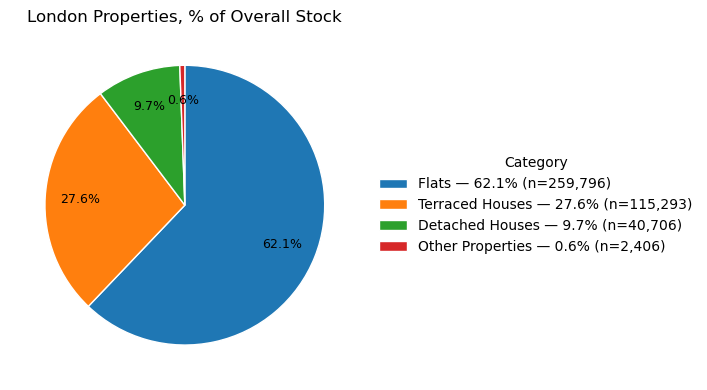

In [35]:
# Plot
plot_df = category_distribution.sort_values("percentage", ascending=False).copy()

fig, ax = plt.subplots(figsize=(7, 4))

wedges, texts, autotexts = ax.pie(
    plot_df["percentage"],
    labels=None,                 
    autopct="%1.1f%%",           
    startangle=90,               
    counterclock=False,         
    pctdistance=0.75,           
    wedgeprops={"edgecolor": "white", "linewidth": 1}
)

ax.set_title("London Properties, % of Overall Stock")

legend_labels = [
    f"{cat} — {pct:.1f}% (n={cnt:,})"
    for cat, pct, cnt in zip(
        plot_df["property_category"],
        plot_df["percentage"],
        plot_df["property_count"]
    )
]
ax.legend(
    wedges,
    legend_labels,
    title="Category",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    frameon=False
)

for t in autotexts:
    t.set_fontsize(9)

ax.set_aspect("equal") 
plt.tight_layout()
plt.show()

# B. London Property Pucrhase and Rental Prices

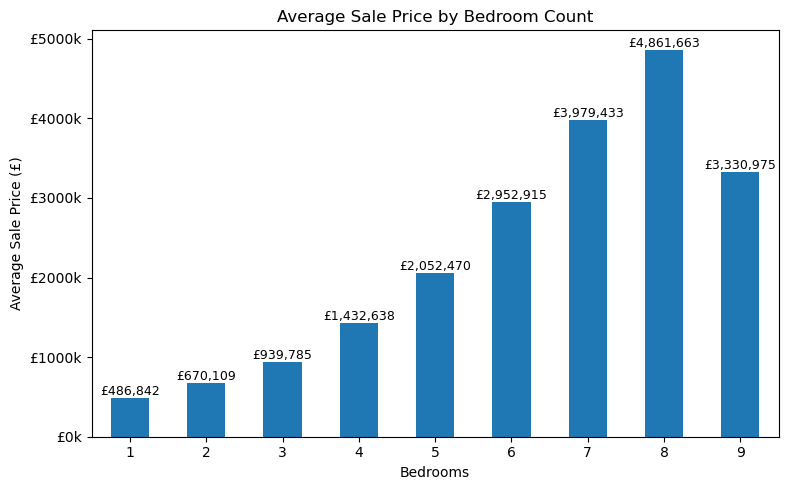

In [74]:
# B.1 Average sale price per number of bedrooms
#
# For this visualisation we use:
# - bedrooms (grouping variable)
# - saleEstimate_currentPrice (to calculate averages)

sale_df = df.dropna(subset=["bedrooms", "saleEstimate_currentPrice"]).copy()

# Calculate average sale price per bedroom
sale_per_beds = (
    sale_df
    .groupby("bedrooms")
    .agg(avg_sale_price=("saleEstimate_currentPrice", "mean"))
    .reset_index()
)

# Round average sale prices for readability
sale_per_beds["avg_sale_price"] = sale_per_beds["avg_sale_price"].round(0).astype(int)

# Plot
ax = sale_per_beds.plot(
    x="bedrooms",
    y="avg_sale_price",
    kind="bar",
    figsize=(8, 5),
    legend=False
)

# Add value labels on bars
for p in ax.patches:
    ax.annotate(
        f"£{p.get_height():,}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=9
    )

#Format
ax.set_title("Average Sale Price by Bedroom Count")
ax.set_xlabel("Bedrooms")
ax.set_ylabel("Average Sale Price (£)")


# Format y-axis as £k and remove scientific notation 
ax.yaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f"£{int(x/1000)}k")
)
ax.yaxis.get_offset_text().set_visible(False)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

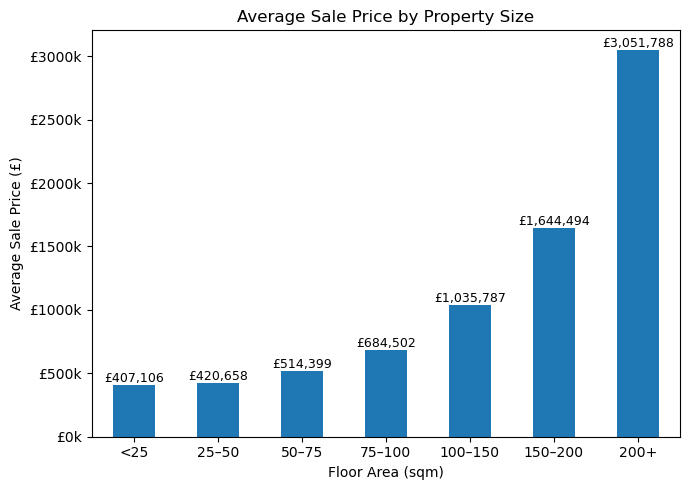

In [73]:
# B.2 Average sale price by floor area band
#
# For this visualisation we use:
# - area_bin (floor area bands defined below)
# - saleEstimate_currentPrice (to calculate averages)

area_sale_df = df.dropna(subset=["floorAreaSqM", "saleEstimate_currentPrice"]).copy()

bins = [0, 25, 50, 75, 100, 150, 200, np.inf]
labels = ["<25", "25–50", "50–75", "75–100", "100–150", "150–200", "200+"]

area_sale_df["area_bin"] = pd.cut(
    area_sale_df["floorAreaSqM"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Calculate average sale price by floor area band
sale_per_area = (
    area_sale_df
    .groupby("area_bin", observed=True)
    .agg(avg_sale_price=("saleEstimate_currentPrice", "mean"))
    .reset_index()
)

# Round average sale prices for readability
sale_per_area["avg_sale_price"] = sale_per_area["avg_sale_price"].round(0).astype(int)

# Plot
ax = sale_per_area.plot(
    x="area_bin",
    y="avg_sale_price",
    kind="bar",
    figsize=(7, 5),
    legend=False
)

# Add value labels above each bar
for p in ax.patches:
    ax.annotate(
        f"£{p.get_height():,}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=9
    )

#Format
ax.set_title("Average Sale Price by Property Size")
ax.set_xlabel("Floor Area (sqm)")
ax.set_ylabel("Average Sale Price (£)")

# Format y-axis as £k and remove scientific notation 
ax.yaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f"£{int(x/1000)}k")
)
ax.yaxis.get_offset_text().set_visible(False)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

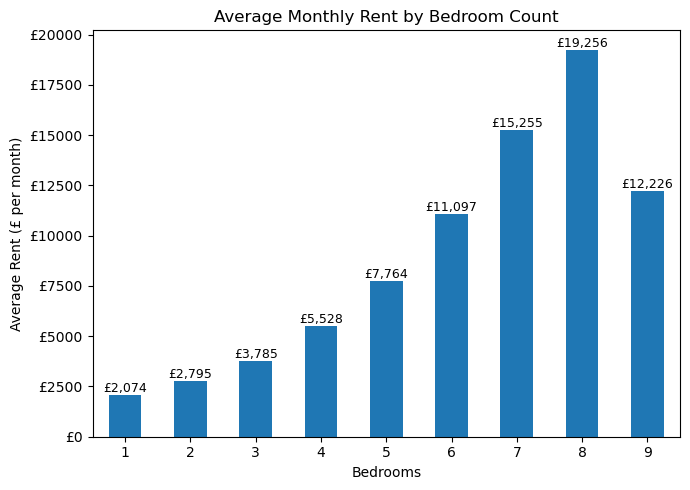

In [77]:
# B.3 Average monthly rent by number of bedrooms
#
# For this visualisation we use:
# - bedrooms (grouping variable)
# - rentEstimate_currentPrice (to calculate averages)
rent_df = df.dropna(subset=["bedrooms", "rentEstimate_currentPrice"]).copy()

# Calculate average rent per bedroom
rent_per_beds = (
    rent_df
    .groupby("bedrooms")
    .agg(avg_rent=("rentEstimate_currentPrice", "mean"))
    .reset_index()
)

# Round average rent for readability
rent_per_beds["avg_rent"] = rent_per_beds["avg_rent"].round(0).astype(int)

# Plot
ax = rent_per_beds.plot(
    x="bedrooms",
    y="avg_rent",
    kind="bar",
    figsize=(7, 5),
    legend=False
)

# Add value labels on bars
for p in ax.patches:
    ax.annotate(
        f"£{p.get_height():,}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=9
    )

ax.set_title("Average Monthly Rent by Bedroom Count")
ax.set_xlabel("Bedrooms")
ax.set_ylabel("Average Rent (£ per month)")
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"£{int(x)}"))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

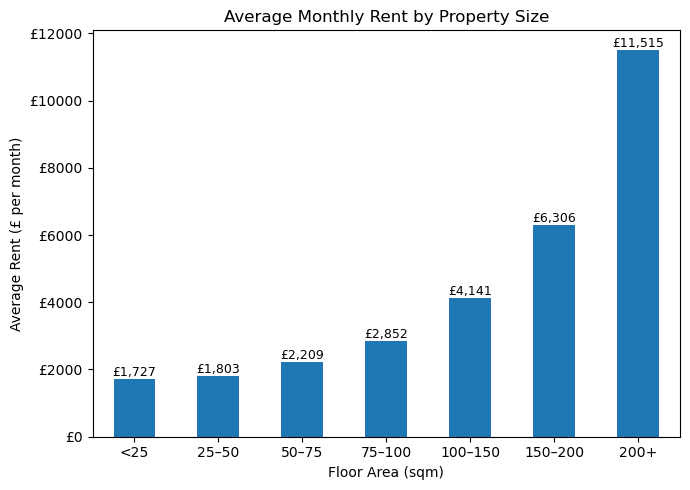

In [76]:
# B.4 Average monthly rent by floor area band
#
# For this visualisation we use::
# - area_bin (we use floor area bands from the previous section)
# - rentEstimate_currentPrice (to calculate averages)

area_rent_df = df.dropna(subset=["floorAreaSqM", "rentEstimate_currentPrice"]).copy()

bins = [0, 25, 50, 75, 100, 150, 200, np.inf]
labels = ["<25", "25–50", "50–75", "75–100", "100–150", "150–200", "200+"]

area_rent_df["area_bin"] = pd.cut(
    area_rent_df["floorAreaSqM"],
    bins=bins,
    labels=labels,
    include_lowest=True
)


# Calculate average rent by floor area band
rent_per_area = (
    area_rent_df
    .groupby("area_bin", observed=True)
    .agg(avg_rent=("rentEstimate_currentPrice", "mean"))
    .reset_index()
)

# Round average rent for readability
rent_per_area["avg_rent"] = rent_per_area["avg_rent"].round(0).astype(int)


# PLot
ax = rent_per_area.plot(
    x="area_bin",
    y="avg_rent",
    kind="bar",
    figsize=(7, 5),
    legend=False
)

# Add value labels above each bar
for p in ax.patches:
    ax.annotate(
        f"£{p.get_height():,}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=9
    )

ax.set_title("Average Monthly Rent by Property Size")
ax.set_xlabel("Floor Area (sqm)")
ax.set_ylabel("Average Rent (£ per month)")
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"£{int(x)}"))

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# C. Property Market Trends

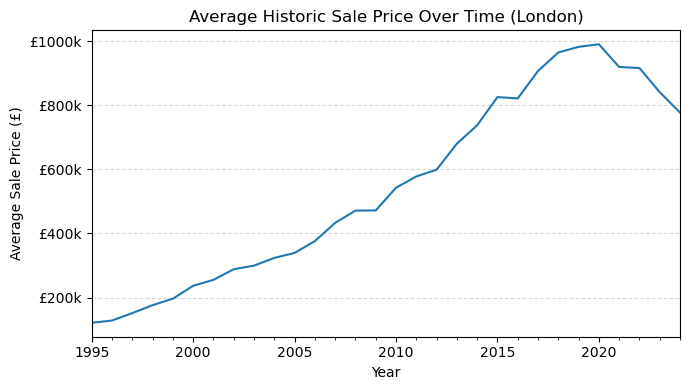

In [70]:
# C.1 How London property values have evolved over time (average historic sale price)
#
# For this time-series we need:
# - history_date (transaction date)
# - history_price (historic sale price)
#
# We therefore drop missing values only for these columns, convert types,
# then aggregate to yearly averages for a trend visualisation.

prices_df = df[["history_date", "history_price"]].dropna(subset=["history_date", "history_price"]).copy()

# Check the type of the history_date and convert to datetime to construct a timeseries
prices_df["history_date"].dtype
prices_df["history_date"] = pd.to_datetime(prices_df["history_date"], errors="coerce")

# Calculate average historic sale price by year
prices_over_years = (
    prices_df
    .groupby(pd.Grouper(key="history_date", freq="YE"))
    .agg(avg_sale_price=("history_price", "mean"))
    .reset_index()
)

# Plot yearly trend
ax = prices_over_years.plot(
    x="history_date",
    y="avg_sale_price",
    kind="line",
    figsize=(7, 4),
    legend=False
)

ax.set_title("Average Historic Sale Price Over Time (London)")
ax.set_xlabel("Year")
ax.set_ylabel("Average Sale Price (£)")
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"£{int(x/1000)}k"))
ax.yaxis.get_offset_text().set_visible(False)

ax.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

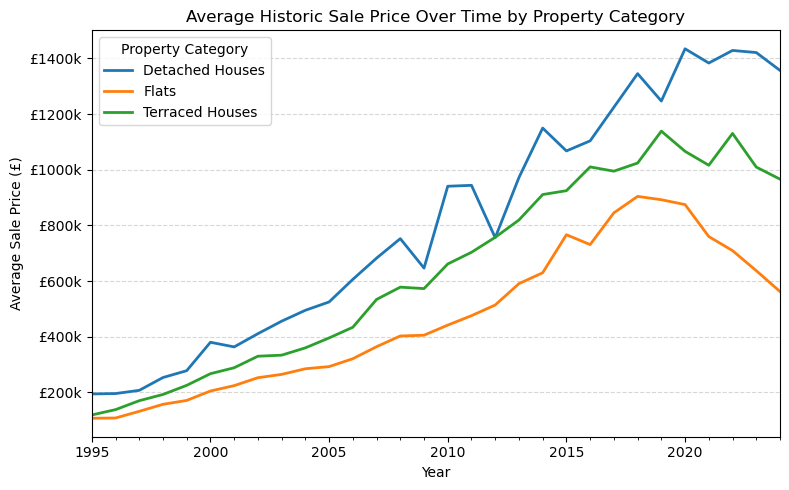

In [79]:
# C.2 Average historic sale price over time by property category
#
# For this analysis we need:
# - history_date 
# - history_price 
# - property_category (from the section A)
#
# We apply drop missining values,
# then aggregate to yearly averages per category. The result is pivoted into a
# wide format (one column per category) to enable a multi-line time-series plot.

prices_df_categories = (
    df[["history_date", "history_price", "propertyType"]]
    .dropna(subset=["history_date", "history_price", "propertyType"])
    .copy()
)

## Creating categories (as per section A)--------------------------------------------------------------

conditions = [
    # Flats
    type_df["propertyType"].str.contains("Flat|Maisonette", case=False, na=False),

    # Detached houses (but not bungalows)
    type_df["propertyType"].str.contains("Detached", case=False, na=False)
    & ~type_df["propertyType"].str.contains("Bungalow", case=False, na=False),

    # Terraced houses (but not bungalows)
    type_df["propertyType"].str.contains("Terrace|Terraced", case=False, na=False)
    & ~type_df["propertyType"].str.contains("Bungalow", case=False, na=False),
]

choices = [
    "Flats",
    "Detached Houses",
    "Terraced Houses",
]

prices_df_categories["property_category"] = np.select(
    conditions,
    choices,
    default="Other Properties"
)


##------------------------------------------------------------------------------------------------

# Ensure correct dateccolumn data type for time-series 
prices_df_categories["history_date"] = pd.to_datetime(prices_df_categories["history_date"], errors="coerce")


# Yearly average historic sale price by category
prices_over_years_categories = (
    prices_df_categories
    .groupby([pd.Grouper(key="history_date", freq="YE"), "property_category"])
    .agg(avg_sale_price=("history_price", "mean"))
    .reset_index()
)

# Pivot to wide format: rows = years, columns = categories, values = average prices
prices_wide = prices_over_years_categories.pivot(
    index="history_date",
    columns="property_category",
    values="avg_sale_price"
)

# Exclude 'Other Properties' due to small / volatile sample sizes which can distort means
if "Other Properties" in prices_wide.columns:
    prices_wide = prices_wide.drop(columns=["Other Properties"])

# Multi-line plot (one trendline per category)
ax = prices_wide.plot(
    figsize=(8, 5),
    linewidth=2
)

ax.set_title("Average Historic Sale Price Over Time by Property Category")
ax.set_xlabel("Year")
ax.set_ylabel("Average Sale Price (£)")
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"£{int(x/1000)}k"))
ax.yaxis.get_offset_text().set_visible(False)

ax.legend(title="Property Category", loc="upper left")
ax.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


# D. Geographic Differences in London Property Values and Rental Prices


In [39]:
# D.1 Most and least expensive city areas to buy a property in
#
# This section summarises property values across London outcodes
# based on their average estimated sale price.
#
# For this analysis we use:
# - outcode (a high-level geographic grouping of properties)
# - saleEstimate_currentPrice
#
# We calculate the average sale price per outcode and track the number of
# properties in each area. Outcodes with very small samples are excluded to
# avoid misleading averages.

outcode_summary_sale = (
    df
    .dropna(subset=["outcode", "saleEstimate_currentPrice"])
    .groupby("outcode")
    .agg(
        average_sale_price=("saleEstimate_currentPrice", "mean"),
        property_count=("saleEstimate_currentPrice", "count")
    )
    .reset_index()
)

# Exclude outcodes with fewer than 50 properties to avoid misleading averages
filtered_outcodes_sale = outcode_summary_sale[outcode_summary_sale["property_count"] >= 50]

In [42]:
# 10 most expensive city areas to buy a property in
top_10_outcodes_sale = (
    filtered_outcodes_sale[["outcode", "average_sale_price"]]
    .sort_values(by="average_sale_price", ascending=False)
    .head(10)
)

# Round property values for readability
top_10_outcodes_sale["average_sale_price"] = (
    top_10_outcodes_sale["average_sale_price"].round(0).astype(int)
)

top_10_outcodes_sale

,outcode,average_sale_price
118,SW1X,3706134
142,W1S,2865462
141,W1K,2775120
152,W8,2710699
117,SW1W,2668967
126,SW7,2485639
140,W1J,2474529
134,W1B,2412243
112,SW1A,2387559
122,SW3,2182414


In [44]:
# 10 least expensive areas to buy a property in 
bottom_10_outcodes_sale = (
    filtered_outcodes_sale[["outcode", "average_sale_price"]]
    .sort_values(by="average_sale_price", ascending=True)
    .head(10)
)

bottom_10_outcodes_sale["average_sale_price"] = (
    bottom_10_outcodes_sale["average_sale_price"].round(0).astype(int)
)

bottom_10_outcodes_sale

,outcode,average_sale_price
94,SE28,337642
62,N9,382294
50,N18,402416
15,E6,411759
91,SE25,413702
83,SE18,421142
85,SE2,424286
4,E13,428751
157,WC1H,445583
86,SE20,456468


In [46]:
# D.2 Most and least expensive city areas to rent in 
#
# In a similiar to the previous section way, 
# here we look at average rental prices across London outcodes.
#
# For this calculation we use:
# - outcode
# - rentEstimate_currentPrice
#
# We calculate the average rent per outcode and also track the number
# of properties in each area. Outcodes with very small samples are
# excluded to avoid misleading averages.

outcode_summary_rent = (
    df
    .dropna(subset=["outcode", "rentEstimate_currentPrice"])
    .groupby("outcode")
    .agg(
        average_rent=("rentEstimate_currentPrice", "mean"),
        property_count=("rentEstimate_currentPrice", "count")
    )
    .reset_index()
)

# Exclude outcodes with fewer than 50 properties to avoid misleading averages
filtered_outcodes_rent = outcode_summary_rent[outcode_summary_rent["property_count"] >= 50]

In [47]:
# 10 most expensive areas to rent in

top_10_outcodes_rent = (
    filtered_outcodes_rent[["outcode", "average_rent"]]
    .sort_values(by="average_rent", ascending=False)
    .head(10)
)

# Round rent values for readability
top_10_outcodes_rent["average_rent"] = top_10_outcodes["average_rent"].round(0).astype(int)

top_10_outcodes_rent

,outcode,average_rent
118,SW1X,14972
134,W1B,10671
152,W8,10382
117,SW1W,10221
141,W1K,9885
130,W11,9053
112,SW1A,8733
142,W1S,8655
126,SW7,8634
72,NW8,7991


In [48]:
# 10 most affordable areas to rent in

bottom_10_outcodes_rent = (
    filtered_outcodes_rent[["outcode", "average_rent"]]
    .sort_values(by="average_rent", ascending=True)
    .head(10)
)

# Round rent values for readability
bottom_10_outcodes_rent["average_rent"] = bottom_10_outcodes["average_rent"].round(0).astype(int)

bottom_10_outcodes_rent

,outcode,average_rent
94,SE28,1663
62,N9,1683
91,SE25,1853
98,SE6,1910
83,SE18,1994
4,E13,2034
6,E15,2058
50,N18,2064
15,E6,2142
86,SE20,2163


# Project Summary and Key Findings

In [50]:
# London's Housing Stock Composition
# London’s housing stock is varied, but the majority of properties
# are flats, which make up around 62% of the market.
# This is followed by terraced houses (about 28%) and detached
# houses (around 10%).
#
# 1-, 2-, and 3-bedroom properties are the most common in the
# London housing market.
# In terms of size, properties in the 50–75 sqm, 75–100 sqm,
# and 100–150 sqm ranges are by far the most common.
#
# ------------------------------------------------------------
# Purchase and Rental Values
# As expected, both property prices and rents in London increase
# with property size and the number of bedrooms.
# Larger properties and those with more bedrooms generally
# command higher sale prices and higher rents.
#
# ------------------------------------------------------------
# Market Trends
# London property values show a steady upward trend up to around
# 2020. After this point, there is a noticeable slowdown and a
# deviation from the long-term upward trend.
#
# This pattern is visible across all property categories.
# Detached houses are consistently the most expensive, followed
# by terraced houses, with flats being the least expensive.
#
# ------------------------------------------------------------
# Geographic Differences
# Property prices in London vary significantly by area.
# Large differences are observed across different outcodes,
# both in sale prices and rental values.
#
# These geographic differences alone could form a separate,
# self-contained analysis. Due to the scope of this project,
# they are not explored in further detail here.
#
# ------------------------------------------------------------
# Overall Summary
# The analysis shows that property type, size, and location all
# play an important role in shaping London’s housing market.
# While clear patterns emerge across the market as a whole,
# location remains one of the strongest drivers of both prices
# and rents.